In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

import seaborn as sns

# Q2 Graphs

## Priority

In [8]:
prioDF = pd.read_json("Trec_data/prioScoreDF.json")
prioDF.columns

Index(['genScores', 'specScores', 'genLabelScores', 'specLabelScores',
       'avgF1Gen', 'avgF1GenUnknown', 'avgF1GenLow', 'avgF1GenMedium',
       'avgF1GenHigh', 'avgF1GenCritical', 'avgF1Spec', 'avgF1SpecUnknown',
       'avgF1SpecLow', 'avgF1SpecMedium', 'avgF1SpecHigh', 'avgF1SpecCritical',
       'semF1Gen', 'semF1GenUnknown', 'semF1GenLow', 'semF1GenMedium',
       'semF1GenHigh', 'semF1GenCritical', 'semF1Spec', 'semF1SpecUnknown',
       'semF1SpecLow', 'semF1SpecMedium', 'semF1SpecHigh', 'semF1SpecCritical',
       'avgAccGen', 'avgAccGenUnknown', 'avgAccGenLow', 'avgAccGenMedium',
       'avgAccGenHigh', 'avgAccGenCritical', 'avgAccSpec', 'avgAccSpecUnknown',
       'avgAccSpecLow', 'avgAccSpecMedium', 'avgAccSpecHigh',
       'avgAccSpecCritical', 'semAccGen', 'semAccGenUnknown', 'semAccGenLow',
       'semAccGenMedium', 'semAccGenHigh', 'semAccGenCritical', 'semAccSpec',
       'semAccSpecUnknown', 'semAccSpecLow', 'semAccSpecMedium',
       'semAccSpecHigh', 'semAccSpecC

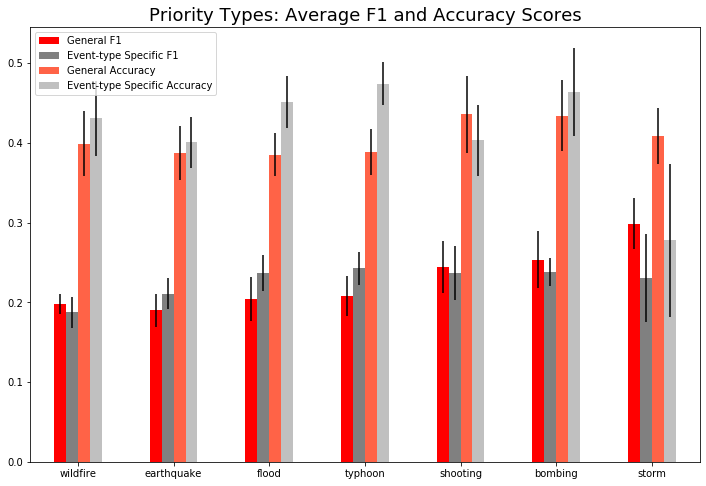

In [11]:
#visualization: birds-eye

plt.figure(figsize=(12, 8))
ax = plt.axes()

genF1 = [item for item in prioDF['avgF1Gen']]
specF1 = [item for item in prioDF['avgF1Spec']]
ste_gen = [item for item in prioDF['semF1Gen']]
ste_spec = [item for item in prioDF['semF1Spec']]
index = [item for item in prioDF.index]

genacc = [item for item in prioDF['avgAccGen']]
specacc = [item for item in prioDF['avgAccSpec']]
ste_genacc = [item for item in prioDF['semAccGen']]
ste_specacc = [item for item in prioDF['semAccSpec']]

df_prio = pd.DataFrame({'General F1': genF1,

                   'Event-type Specific F1': specF1, 'General Accuracy': genacc, 
                        
                    'Event-type Specific Accuracy': specacc}, index=index)

ax.set_title('Priority Types: Average F1 and Accuracy Scores', fontsize = 18)
ax = df_prio.plot.bar(rot=0, ax=ax, yerr = [ste_gen, ste_spec, ste_genacc, ste_specacc], 
                      color=['red', 'grey', 'tomato', 'silver'])

plt.show()

In [55]:
#DataFrame with only one priority type
def isolate(frame, priority_type):
    drop_list = []
    newDF = frame
    
    for i in prioDF.columns.tolist():
        if i.find(priority_type) == -1:
            drop_list.append(i)
            
    newDF = newDF.drop(columns=drop_list)
    return newDF

def visualize(prioDF, priority_type):
    DF = isolate(prioDF, priority_type)
    
    plt.figure(figsize=(12, 8))
    ax = plt.axes()
    
    genF1 = [item for item in DF['avgF1Gen' + priority_type]]
    specF1 = [item for item in DF['avgF1Spec' + priority_type]]
    ste_gen = [item for item in DF['semF1Gen' + priority_type]]
    ste_spec = [item for item in DF['semF1Spec' + priority_type]]
    index = [item for item in DF.index]

    genacc = [item for item in DF['avgAccGen' + priority_type]]
    specacc = [item for item in DF['avgAccSpec' + priority_type]]
    ste_genacc = [item for item in DF['semAccGen' + priority_type]]
    ste_specacc = [item for item in DF['semAccSpec' + priority_type]]

    df_prio = pd.DataFrame({'General F1': genF1,

                   'Event-type Specific F1': specF1, 'General Accuracy': genacc, 
                        
                    'Event-type Specific Accuracy': specacc}, index=index)

    ax.set_title(priority_type + ' Priority Type: Average F1 and Accuracy Scores', fontsize = 18)
    ax = df_prio.plot.bar(rot=0, ax=ax, yerr = [ste_gen, ste_spec, ste_genacc, ste_specacc], 
                      color=['red', 'grey', 'tomato', 'silver'])

    plt.show()

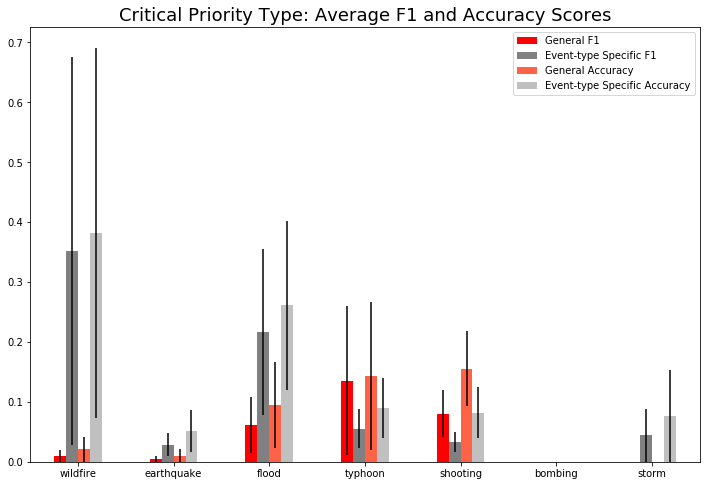

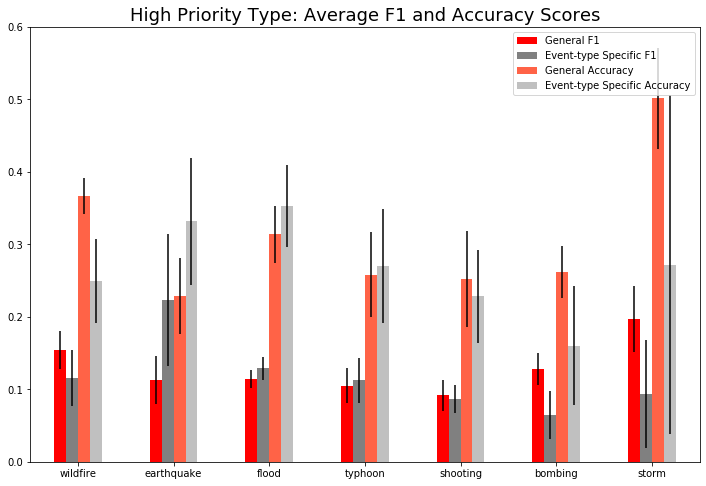

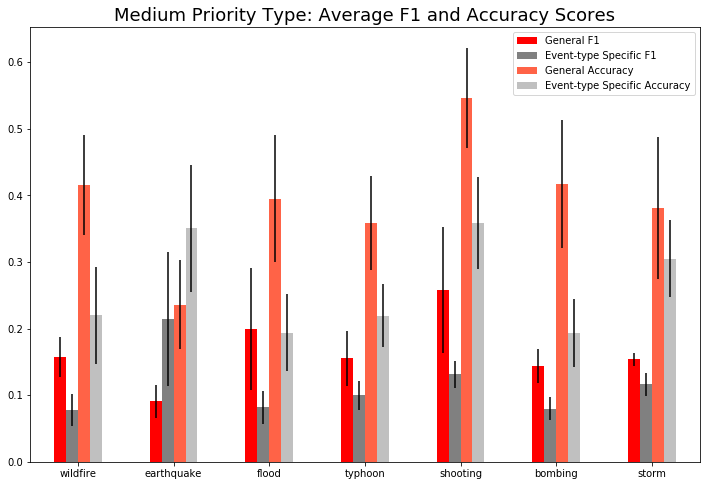

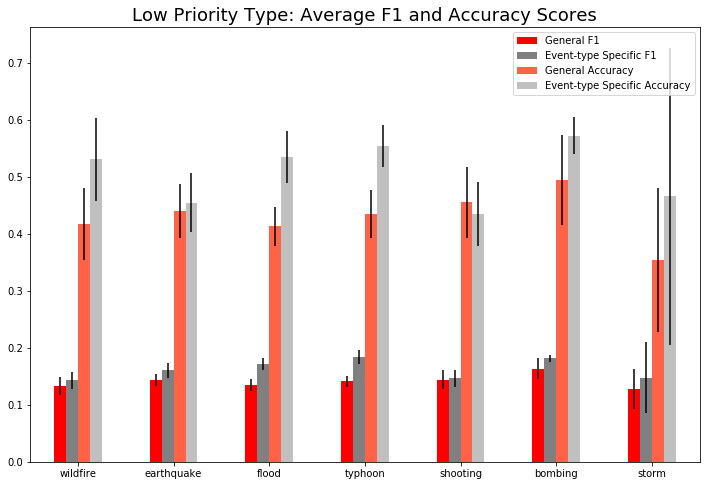

In [57]:
visualize(prioDF, "Critical")
visualize(prioDF, "High")
visualize(prioDF, "Medium")
visualize(prioDF, "Low")

In [41]:
#Archived standard error post-calculation
prioDF['n'] = [5, 11, 12, 13, 10, 3, 2]

ste_prio_gen = []
ste_prio_spec = []
ste_prio_genacc = []
ste_prio_specacc = []


for row in prioDF.itertuples():
    F1Gen = row.stdF1Gen
    F1Spec = row.stdF1Spec
    F1Genacc = row.stdAccGen
    F1Specacc = row.stdAccSpec
    steGen = F1Gen / sqrt(row.n)
    steSpec = F1Spec / sqrt(row.n)
    steGenacc = F1Genacc / sqrt(row.n)
    steSpecacc = F1Specacc / sqrt(row.n)
    ste_prio_gen.append(steGen)
    ste_prio_spec.append(steSpec)
    ste_prio_genacc.append(steGenacc)
    ste_prio_specacc.append(steSpecacc)
    print('Priority Event:', row[0], 'Gen:', steGen, 'Spec:', steSpec, 'GenAcc:', steGenacc, 'SpecAcc:', steSpecacc)


AttributeError: 'Pandas' object has no attribute 'stdF1Gen'

## Categories

In [ ]:
catDF = pd.read_json("Trec_data/catScoreDF.json")
catDF['n'] = [5, 11, 12, 13, 10, 3, 2]

In [9]:
catDF

,genScores,specScores,avgAccGen,avgAccSpec,avgF1Gen,avgF1Spec,stdAccGen,stdAccSpec,stdF1Gen,stdF1Spec,n
wildfire,"[[0.0065359477, 0.0017825312, 0.0084937712, 0....","[[0.0065359477, 0.0017825312, 0.0016987542, 0....",0.021559,0.002500,0.153854,0.139205,0.020001,0.002177,0.040578,0.034574,5
earthquake,"[[0.016949152500000002, 0.0181818182, 0.015151...","[[0.0056497175, 0.0090909091, 0.0, 0.019379845...",0.028901,0.010777,0.125732,0.117239,0.022097,0.009528,0.043702,0.036152,11
flood,"[[0.0218579235, 0.0, 0.0023094688, 0.010033444...","[[0.0109289617, 0.0, 0.0, 0.0033444816, 0.0123...",0.047879,0.048423,0.141255,0.131016,0.057599,0.065098,0.055937,0.053121,12
typhoon,"[[0.0056179775, 0.0131004367, 0.03947368420000...","[[0.0056179775, 0.0043668122, 0.02631578950000...",0.042040,0.019895,0.132398,0.122341,0.028210,0.010345,0.067420,0.055603,13
shooting,"[[0.007462686600000001, 0.0014836795, 0.083973...","[[0.007462686600000001, 0.0029673591, 0.059275...",0.086057,0.117026,0.136266,0.131367,0.081442,0.118685,0.045523,0.044265,10
bombing,"[[0.033333333300000004, 0.025641025600000002, ...","[[0.0, 0.0224358974, 0.0006944444], [0.0829538...",0.027297,0.007710,0.143216,0.113067,0.004411,0.010417,0.030101,0.025661,3
storm,"[[0.013136289, 0.0], [0.21704542000000002, 0.2...","[[0.0, 0.0], [0.1605590071, 0.2021344467]]",0.006568,0.000000,0.213506,0.181347,0.006568,0.000000,0.003539,0.020788,2


In [40]:
from math import sqrt

ste_cat_gen = []
ste_cat_spec = []

#standard error

for row in catDF.itertuples():
    F1Gen = row.stdF1Gen
    F1Spec = row.stdF1Spec
    steGen = F1Gen / sqrt(row.n)
    steSpec = F1Spec / sqrt(row.n)
    ste_cat_gen.append(steGen)
    ste_cat_spec.append(steSpec)
    print('Event:', row[0], 'Gen:', steGen, 'Spec:', steSpec)

Event: wildfire Gen: 0.018147210810658353 Spec: 0.015462020172746607
Event: earthquake Gen: 0.013176748499575688 Spec: 0.010900277977556737
Event: flood Gen: 0.01614764849379585 Spec: 0.015334669140978962
Event: typhoon Gen: 0.01869885335782344 Spec: 0.015421479922440298
Event: shooting Gen: 0.014395538076306605 Spec: 0.01399791731059772
Event: bombing Gen: 0.01737900212554486 Spec: 0.01481515022410333
Event: storm Gen: 0.002502485412311397 Spec: 0.014699137630414392
Priority Event: wildfire Gen: 0.011507854208812464 Spec: 0.017618446785643296 GenAcc: 0.03636387193740801 SpecAcc: 0.04229493767284953
Priority Event: earthquake Gen: 0.01982239087646631 Spec: 0.018628282882809346 GenAcc: 0.03261099662233865 SpecAcc: 0.03021101948266695
Priority Event: flood Gen: 0.025267766185556657 Spec: 0.020765376053216412 GenAcc: 0.024514195471399786 SpecAcc: 0.030103607077085703
Priority Event: typhoon Gen: 0.019493236516992606 Spec: 0.016266352521343716 GenAcc: 0.022604177998933075 SpecAcc: 0.021442

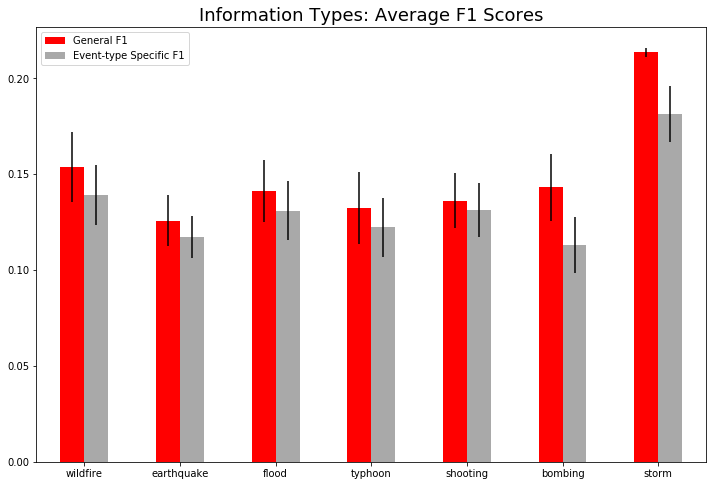

In [32]:
#category results

plt.figure(figsize=(12, 8))

ax = plt.axes()

catgenF1 = [item for item in catDF['avgF1Gen']]
catspecF1 = [item for item in catDF['avgF1Spec']]
ste_gencat = [item for item in ste_cat_gen]
ste_speccat = [item for item in ste_cat_spec]
index = [item for item in catDF.index]

df2 = pd.DataFrame({'General F1': catgenF1,

                   'Event-type Specific F1': catspecF1}, index=index)

ax.set_title('Information Types: Average F1 Scores', fontsize = 18)

ax = df2.plot.bar(rot=0, ax=ax, yerr = [ste_gencat, ste_speccat], color=['red', 'darkgrey'])
plt.show()

# Q1

In [58]:
#color selection

print("Colormap dark:salmon is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r")

Colormap dark:salmon is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_st

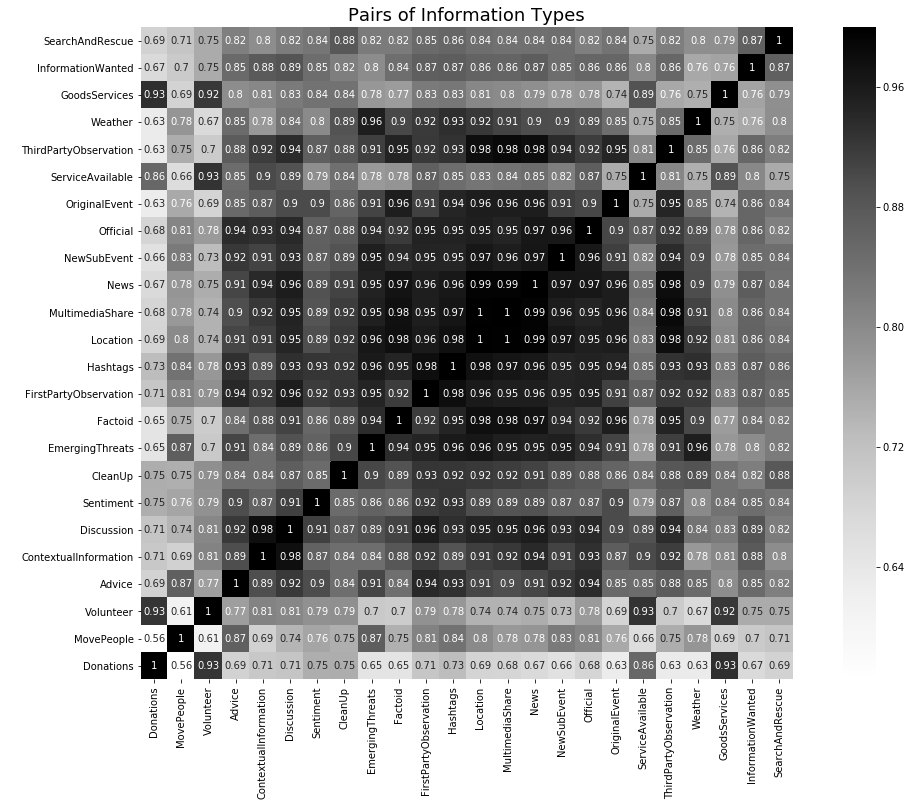

In [2]:
#similarity matrices

info_ranks = pd.read_csv("final_info_ranks.csv", index_col = 0)

#info types
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))

ax = plt.axes()

ax.set_title('Pairs of Information Types', fontsize = 18)

sns.heatmap(info_ranks, ax=ax,cmap="Reds", annot=True, square=True)
plt.ylabel(' ')
#sns.heatmap(dt_tweet_cnt, ax=ax2)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

plt.show()

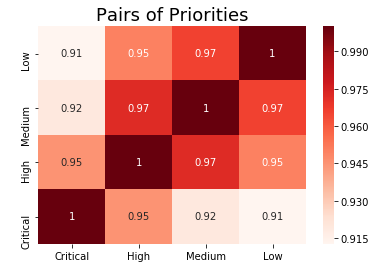

In [4]:
#priority
plt.figure(figsize=(6, 4))

ax = plt.axes()


critical_ranks = pd.read_csv("critical_ranks.csv", index_col = 0)


ax.set_title('Pairs of Priorities', fontsize=18)
sns.heatmap(critical_ranks, ax=ax,cmap="Reds", annot=True)
plt.ylabel(' ')
#sns.heatmap(dt_tweet_cnt, ax=ax2)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

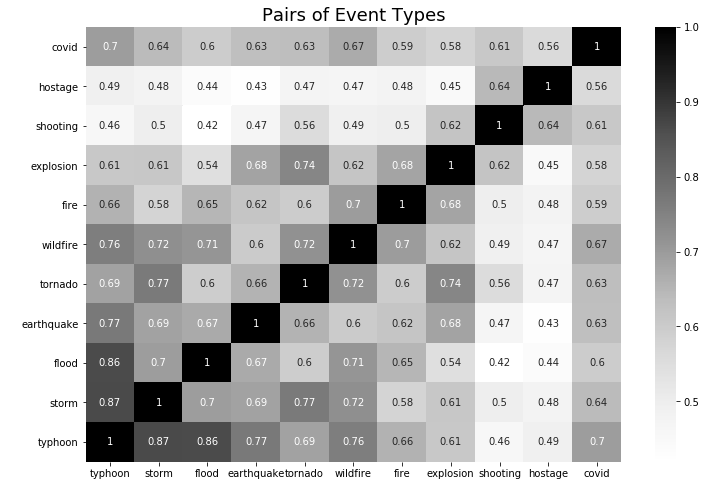

In [5]:
#events
plt.figure(figsize=(12, 8))

ax = plt.axes()
event_ranks = pd.read_csv('final_event_ranks.csv', index_col = 0)


ax.set_title('Pairs of Event Types', fontsize=18)
sns.heatmap(event_ranks, ax=ax,cmap="Reds", annot=True)
plt.ylabel(' ')
#sns.heatmap(dt_tweet_cnt, ax=ax2)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

## Significance testing priority types

In [86]:
from math import sqrt
from numpy import dot
from numpy.linalg import norm
import random

In [77]:
infile = open('pickle','rb')
df = pickle.load(infile)
infile.close()
df

,eventID,eventType,postID,postCategories,postPriority,postText,processed_text,sbert_emb
602,tennesseeDerecho2020,storm,1257045884560461824,"[Location, MultimediaShare, ContextualInformat...",Low,Nashville Mayor Floats 32 Percent Property Tax...,"[mayor, float, percent, property, tax, hike, c...","[0.28595802, 1.8915048, 0.55441177, -0.9483588..."
604,tennesseeDerecho2020,storm,1256433237301137408,"[Weather, Location]",Low,Summerdale Bartlett TN Weather 11:00 PM Temp: ...,"[tn, weather, pm, bar, change, rain, today, mo...","[-0.98355895, 0.28966317, -0.46716905, -0.3054..."
605,tennesseeDerecho2020,storm,1256913902224334848,"[Weather, Location, Discussion]",Low,"@tanueki TN Air 001, Mac tower.\nWind 60 degre...","[tn, air, mac, tower, wind, degree, knot, runw...","[-0.15513411, -1.2664062, -0.39587763, -1.2604..."
606,tennesseeDerecho2020,storm,1257044059593588736,"[Weather, Location, MultimediaShare, Hashtags,...",High,#STORM12ALERT SEVERE THUNDERSTORM WARNING for ...,"[storm, alert, warning, county, tn, pm, wd]","[-0.22859125, 0.7158369, 0.5458465, -0.2751035..."
607,tennesseeDerecho2020,storm,1257058413298712576,"[Weather, Location, MultimediaShare, Official,...",High,Nashville metro find your Safe Spots now. We a...,"[metro, find, safe, spot, roughly, minute, awa...","[0.18250313, 0.37942246, -0.2061751, 0.1632700..."
...,...,...,...,...,...,...,...,...
91509,whaleyBridgeCollapse2020,flood,1156949866402189312,"[Location, EmergingThreats, MultimediaShare, F...",High,Oh no #WhaleyBridge has collapsed (minor). Be ...,"[collapse, minor, safe]","[-0.36980346, -0.83787453, -0.61941093, -0.387..."
91511,whaleyBridgeCollapse2020,flood,1156993824591417344,"[Location, EmergingThreats, MultimediaShare, N...",High,Dam at Whaley Bridge in Peak District threaten...,"[peak, district, threaten, burst, gofh, pb, nc...","[0.6226592, 0.7908484, -0.030559858, 0.7343285..."
91512,whaleyBridgeCollapse2020,flood,1157020257388769280,"[ThirdPartyObservation, Location, MultimediaSh...",Low,Floods in Whaley Bridge today.\nhttps://t.co/7...,"[flood, today]","[0.42893374, 1.0268945, 0.099461466, 1.1254044..."
91513,whaleyBridgeCollapse2020,flood,1156926115069485056,"[MovePeople, ThirdPartyObservation, Location, ...",Critical,Evacuation of Whaley Bridge | Derbyshire Const...,"[evacuation, constabulary]","[-0.77845883, -0.1347617, -0.03813635, -0.9778..."


In [81]:
low = []
med = []
high = []
critical = []

for row in df.itertuples():
    postPriority = row.postPriority
    text = row.sbert_emb
    
    if postPriority == 'Low':
        low.append(np.array(text))
        
    elif postPriority == 'Medium':
        med.append(np.array(text))
        
    elif postPriority == 'High':
        high.append(np.array(text))
        
    elif postPriority == 'Critical':
        critical.append(np.array(text))
        
Low = pd.DataFrame()
Low['text'] = [item for item in low]

Med = pd.DataFrame()
Med['text'] = [item for item in med]

High = pd.DataFrame()
High['text'] = [item for item in high]

Critical = pd.DataFrame()
Critical['text'] = [item for item in critical]

In [87]:
def critical_dist(lst1, lst2, dist_name):
    dist_name = []
    for i in range(1000): #make this larger when done

        index1 = random.choice(range(len(lst1)))
        index2 = random.choice(range(len(lst2)))
        
        grp1 = lst1['text'][index1]
        grp2 = lst2['text'][index2]
        
        #print(grp1, grp2)
        cos_sim = dot(grp1,grp2)/(norm(grp1)*norm(grp2))
        #print("cos_sim:", cos_sim)
        dist_name.append(cos_sim)
    return dist_name

In [88]:
cc = []
cc_dist = critical_dist(Critical, Critical, cc)

ch = []
ch_dist = critical_dist(Critical, High, ch)

cm = []
cm_dist = critical_dist(Critical, Med, cm)

cl = []
cl_dist = critical_dist(Critical, Low, cl)

ll = []
ll_dist = critical_dist(Low, Low, ll)

lm = []
lm_dist = critical_dist(Low, Med, lm)

<BarContainer object of 5 artists>

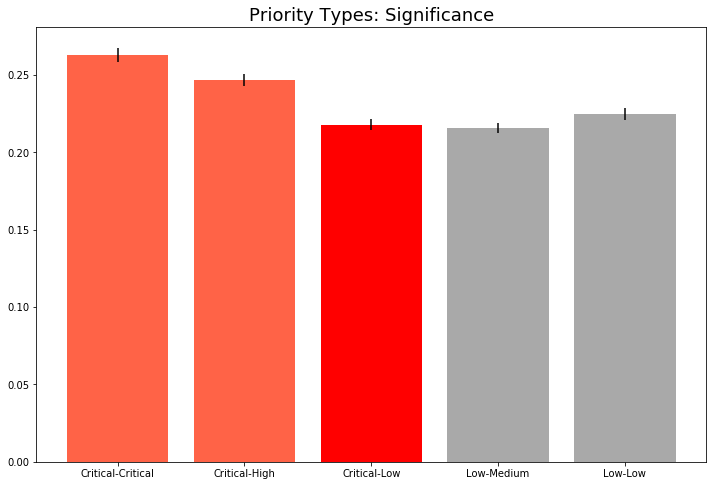

In [99]:

plt.figure(figsize=(12, 8))
ax = plt.axes()
ax.set_title('Priority Types: Significance', fontsize = 18)

mean0 = np.mean(cc_dist)
ste0 = np.std(cc_dist) / sqrt(len(cc_dist))

mean = np.mean(ch_dist)
ste = np.std(ch_dist) / sqrt(len(ch_dist))

mean2 = np.mean(cl_dist)
ste2 = np.std(cl_dist) / sqrt(len(cl_dist))

mean3 = np.mean(lm_dist)
ste3 = np.std(lm_dist) / sqrt(len(lm_dist))

mean4 = np.mean(ll_dist)
ste4 = np.std(ll_dist) / sqrt(len(ll_dist))

plt.bar(['Critical-Critical', 'Critical-High', 'Critical-Low', 'Low-Medium', 'Low-Low'], 
        [mean0, mean, mean2, mean3, mean4], yerr=[ste0, ste, ste2, ste3, ste4], color=['tomato', 'tomato', 
                                                                                'r', 'darkgrey', 'darkgrey'])